# Librerias

In [1]:
#librerias
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""datos faltantes"""
import missingno as msno
"""imputacion de datos"""
from sklearn.impute import SimpleImputer

# Funciones

In [21]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

# Importacion de datos

In [2]:
"""importando flujos extraidos"""
df_probe = pd.read_csv('../../datos_SDN/araData/Probe.csv', low_memory=False)

# 1. Limpieza de datos

## 1.1 Eliminar datos innecesarios

#### Caracteristicas

In [3]:
"""definir caractericticas innecesarias"""
caracteristicas_in=['SrcId','Rank','Trans','sDSb','dDSb','sIpId','dIpId','SrcGap','DstGap','dsPkts','ddPkts','dsBytes',
'ddBytes','pdsPkt','pddPkt','pdsByte','pddByte','(null)','SrcWin','DstWin','JDelay','LDelay','Bins','Bin', 'SrcTCPBase','DstTCPBase'
,'Inode','sPktSz','dPktSz']

In [4]:
df_probe.drop(columns=caracteristicas_in, axis=1, inplace=True)

In [5]:
print(df_probe.shape)

(49452, 93)


#### Protocolos

In [6]:
"""verificiar protocolos para trafico probe"""
df_probe.Proto.unique()

array(['man', 'tcp', 'arp', 'udp', 'icmp', 'lldp', 'ipv6-icmp', 'gmtp',
       'cpnx', 'ipcomp', 'unas', 'ipcv', 'sat-mon', 'pup', 'bbn-rcc',
       'sep', 'a/n', 'ddp', 'ipip', 'rsvp', 'uti', 'ptp', 'ipv6', 'st2',
       'idpr-cmtp', 'mobile', 'isis', 'sm', 'vrrp', 'xns-idp', 'scps',
       'tp++', 'l2tp', 'cbt', 'crudp', 'eigrp', 'snp', 'sps', 'prm',
       'iso-tp4', 'idrp', 'srp', 'chaos', 'ddx', 'igp', 'ipx-n-ip',
       'ipv6-opts', 'gre', 'argus', 'fire', 'xnet', 'wb-expak', 'any',
       'leaf-2', 'pvp', 'sun-nd', 'tlsp', 'aes-sp3-d', 'aris', 'iatp',
       'dgp', 'sprite-rpc', 'visa', 'emcon', 'sccopmce', 'wb-mon', 'xtp',
       'ttp', 'bna', 'ib', 'netblt', 'nvp', 'br-sat-mon', 'mtp', 'crtp',
       'hmp', 'ipv6-frag', 'compaq-peer', 'swipe', 'kryptolan', 'rdp',
       'larp', 'fc', 'smp', 'skip', 'ip', 'rvd', 'mhrp', 'irtp', 'idpr',
       'trunk-2', 'ah', 'cftp', 'encap', 'iso-ip', 'i-nlsp', '3pc', 'stp',
       'igmp', 'ipv6-no', 'narp', 'sdrp', 'sat-expak', 'qnx', 'ggp',


In [7]:
"""analizar protocolos L3 y L4"""
df_probe[(df_probe.Proto=='tcp')| (df_probe.Proto=='udp')| (df_probe.Proto=='icmp')]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
1,09:02:10.588832,09:02:10.588862,09:02:10.588832,09:02:10.588862,09:02:10.588832,09:02:10.588862,1,e,0.000030,0.000030,...,0.000000,NaN,128,54.000000,54.0,54.0,54.0,54.0,54.0,Probe
4,09:02:23.606113,09:02:23.612455,09:02:23.606113,09:02:23.606137,09:02:23.612455,09:02:23.606137,4,e,0.006342,0.006342,...,0.000000,M,984,56.000000,58.0,58.0,58.0,54.0,58.0,Probe
5,09:02:23.611884,09:02:23.617713,09:02:23.611884,09:02:23.611901,09:02:23.617713,09:02:23.611901,5,e,0.005829,0.005829,...,0.000000,M,1256,56.000000,58.0,58.0,58.0,54.0,58.0,Probe
6,09:02:26.333847,09:02:26.333859,09:02:26.333847,09:02:26.333859,09:02:26.333847,09:02:26.333859,6,e,0.000012,0.000012,...,0.000000,NaN,1528,54.000000,54.0,54.0,54.0,54.0,54.0,Probe
7,09:02:39.341093,09:02:39.344779,09:02:39.341093,09:02:39.341132,09:02:39.344779,09:02:39.341132,7,e,0.003686,0.003686,...,0.003593,Mws T,1768,68.666664,74.0,74.0,74.0,66.0,74.0,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49446,08:59:15.697198,08:59:15.697198,08:59:15.697198,19:00:00.000000,08:59:15.697198,19:00:00.000000,48203,e,0.000000,0.000000,...,0.000000,NaN,10430320,87.000000,0.0,87.0,NaN,87.0,NaN,Probe
49447,08:59:15.697668,08:59:15.697668,08:59:15.697668,19:00:00.000000,08:59:15.697668,19:00:00.000000,48204,e,0.000000,0.000000,...,0.000000,NaN,10430432,87.000000,0.0,87.0,NaN,87.0,NaN,Probe
49448,08:59:15.697728,08:59:15.697728,08:59:15.697728,19:00:00.000000,08:59:15.697728,19:00:00.000000,48205,e,0.000000,0.000000,...,0.000000,NaN,10430544,87.000000,0.0,87.0,NaN,87.0,NaN,Probe
49449,08:59:15.697779,08:59:15.697779,08:59:15.697779,19:00:00.000000,08:59:15.697779,19:00:00.000000,48206,e,0.000000,0.000000,...,0.000000,NaN,10430656,87.000000,0.0,87.0,NaN,87.0,NaN,Probe


In [12]:
"""eliminacion de protocolos innecesarios"""
df_probe = df_probe[(df_probe.Proto=='tcp')| (df_probe.Proto=='udp')| (df_probe.Proto=='icmp')]

In [13]:
df_probe.Proto.value_counts()

tcp     36828
udp      5889
icmp     5243
Name: Proto, dtype: int64

#### Duracion de flujos

In [17]:
duracion = df_probe[(df_probe.RunTime==0.0) | (df_probe.Dur==0.0)]
df_probe[(df_probe.RunTime==0.0) | (df_probe.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
45,09:04:30.779428,09:04:30.779428,09:04:30.779428,19:00:00.000000,09:04:30.779428,19:00:00.000000,38,e,0.0,0.0,...,0.0,NaN,10996,114.0,0.0,114.0,NaN,114.0,NaN,Probe
245,09:30:28.200573,09:30:28.200573,09:30:28.200573,19:00:00.000000,09:30:28.200573,19:00:00.000000,191,e,0.0,0.0,...,0.0,NaN,57200,114.0,0.0,114.0,NaN,114.0,NaN,Probe
1034,08:59:54.798939,08:59:54.798939,08:59:54.798939,19:00:00.000000,08:59:54.798939,19:00:00.000000,26,e,0.0,0.0,...,0.0,NaN,109376,203.0,0.0,203.0,NaN,203.0,NaN,Probe
1035,08:59:54.799019,08:59:54.799019,08:59:54.799019,19:00:00.000000,08:59:54.799019,19:00:00.000000,27,e,0.0,0.0,...,0.0,NaN,109512,183.0,0.0,183.0,NaN,183.0,NaN,Probe
1036,08:59:55.445776,08:59:55.445776,08:59:55.445776,19:00:00.000000,08:59:55.445776,19:00:00.000000,28,e,0.0,0.0,...,0.0,NaN,109624,203.0,0.0,203.0,NaN,203.0,NaN,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49446,08:59:15.697198,08:59:15.697198,08:59:15.697198,19:00:00.000000,08:59:15.697198,19:00:00.000000,48203,e,0.0,0.0,...,0.0,NaN,10430320,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49447,08:59:15.697668,08:59:15.697668,08:59:15.697668,19:00:00.000000,08:59:15.697668,19:00:00.000000,48204,e,0.0,0.0,...,0.0,NaN,10430432,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49448,08:59:15.697728,08:59:15.697728,08:59:15.697728,19:00:00.000000,08:59:15.697728,19:00:00.000000,48205,e,0.0,0.0,...,0.0,NaN,10430544,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49449,08:59:15.697779,08:59:15.697779,08:59:15.697779,19:00:00.000000,08:59:15.697779,19:00:00.000000,48206,e,0.0,0.0,...,0.0,NaN,10430656,87.0,0.0,87.0,NaN,87.0,NaN,Probe


No se eliminan flujos con duracion y tiempo de ejecucion de cero, porque existen tecnicas sigilosas de sondeo en UDP y TCP.

In [18]:
print(df_probe.shape)

(47960, 93)


### Eliminacion de flujos con direccion IPV6 Link-Local

In [20]:
df_probe.SrcAddr.unique()

array(['200.175.2.130', '172.17.0.2', '172.17.0.1', '192.168.8.128',
       '192.168.8.129', '192.168.8.1', 'fe80::20c:29ff:fe2d:746b',
       'fe80::20c:29ff:fe92:12c4', '192.168.20.1', '192.168.20.132',
       '192.168.20.133', '192.168.20.134', '192.168.20.131'], dtype=object)

In [22]:
df_probe[(df_probe.SrcAddr=="fe80::20c:29ff:fe2d:746b") | (df_probe.SrcAddr=="fe80::20c:29ff:fe92:12c4")]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
1034,08:59:54.798939,08:59:54.798939,08:59:54.798939,19:00:00.000000,08:59:54.798939,19:00:00.000000,26,e,0.0,0.0,...,0.0,NaN,109376,203.0,0.0,203.0,NaN,203.0,NaN,Probe
1036,08:59:55.445776,08:59:55.445776,08:59:55.445776,19:00:00.000000,08:59:55.445776,19:00:00.000000,28,e,0.0,0.0,...,0.0,NaN,109624,203.0,0.0,203.0,NaN,203.0,NaN,Probe


In [23]:
eliminar_filasvaloresDesconocidos(df_probe,df_probe[(df_probe.SrcAddr=="fe80::20c:29ff:fe2d:746b") | (df_probe.SrcAddr=="fe80::20c:29ff:fe92:12c4")])

In [24]:
print(df_probe.shape)

(47958, 93)


## 1.2 Eliminar valores duplicados

In [25]:
df_probe.duplicated().sum()

0

## 1.3 Revisar variables Redundantes

In [27]:
df_probe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47958 entries, 1 to 49450
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StartTime     47958 non-null  object 
 1   LastTime      47958 non-null  object 
 2   SrcStartTime  47958 non-null  object 
 3   DstStartTime  47958 non-null  object 
 4   SrcLastTime   47958 non-null  object 
 5   DstLastTime   47958 non-null  object 
 6   Seq           47958 non-null  int64  
 7   Flgs          47958 non-null  object 
 8   RunTime       47958 non-null  float64
 9   Dur           47958 non-null  float64
 10  SrcDur        47958 non-null  float64
 11  DstDur        47958 non-null  float64
 12  Mean          47958 non-null  float64
 13  StdDev        47958 non-null  float64
 14  Sum           47958 non-null  float64
 15  Min           47958 non-null  float64
 16  Max           47958 non-null  float64
 17  Dir           47958 non-null  object 
 18  SrcAddr       47958 non-nu

In [34]:
"""caracteristicas relacionadas con temporarizadores de flujo"""
df_probe.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15,16]]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max
1,09:02:10.588832,09:02:10.588862,09:02:10.588832,09:02:10.588862,09:02:10.588832,09:02:10.588862,0.000030,0.000030,0.000000,0.0,0.000030,0.0,0.000030,0.000030,0.000030
4,09:02:23.606113,09:02:23.612455,09:02:23.606113,09:02:23.606137,09:02:23.612455,09:02:23.606137,0.006342,0.006342,0.006342,0.0,0.006342,0.0,0.006342,0.006342,0.006342
5,09:02:23.611884,09:02:23.617713,09:02:23.611884,09:02:23.611901,09:02:23.617713,09:02:23.611901,0.005829,0.005829,0.005829,0.0,0.005829,0.0,0.005829,0.005829,0.005829
6,09:02:26.333847,09:02:26.333859,09:02:26.333847,09:02:26.333859,09:02:26.333847,09:02:26.333859,0.000012,0.000012,0.000000,0.0,0.000012,0.0,0.000012,0.000012,0.000012
7,09:02:39.341093,09:02:39.344779,09:02:39.341093,09:02:39.341132,09:02:39.344779,09:02:39.341132,0.003686,0.003686,0.003686,0.0,0.003686,0.0,0.003686,0.003686,0.003686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49446,08:59:15.697198,08:59:15.697198,08:59:15.697198,19:00:00.000000,08:59:15.697198,19:00:00.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
49447,08:59:15.697668,08:59:15.697668,08:59:15.697668,19:00:00.000000,08:59:15.697668,19:00:00.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
49448,08:59:15.697728,08:59:15.697728,08:59:15.697728,19:00:00.000000,08:59:15.697728,19:00:00.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
49449,08:59:15.697779,08:59:15.697779,08:59:15.697779,19:00:00.000000,08:59:15.697779,19:00:00.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


Las caracteristicas RunTime, Dur, Mean, Sum, Min y Max, visualmente cuentan con los mismos valores. Tal vez porque por cada registro hay un solo flujo, y al existir uno solo 
el valor de la duracion es valor de las demas caracteristicas mencionadas.

In [35]:
"""comprobar si todas las filas tienen el mismo valor del primero en el tiempo, si imprime True entonces hay valores distintos"""
for fila in df_probe.iloc[:,[8,9,12,14,15,16]].values:
    for col in range(6):
        if fila[0] != fila[col]:
            print(True)

## 1.4 Eliminacion por seleccion de caracteristicas

Se eliminan caracteristicas de forma directa, analizando cada una y segun la escala considerada inicialmente (ALTO, MEDIO, BAJO).

In [37]:
caracteristicas_eldir = ['StartTime', 'LastTime','SrcStartTime','DstStartTime','SrcLastTime',
'DstLastTime', 'Seq','Flgs','SrcAddr','DstAddr','Sport','sTos','dTos','sTtl','dTtl','PCRatio','TcpOpt','Cause','State','Dir']

In [38]:
df_probe.drop(columns=caracteristicas_eldir, axis=1, inplace=True)

In [39]:
print(df_probe.shape)

(47958, 73)


# 2. Tratamiento de valores faltantes

<AxesSubplot: >

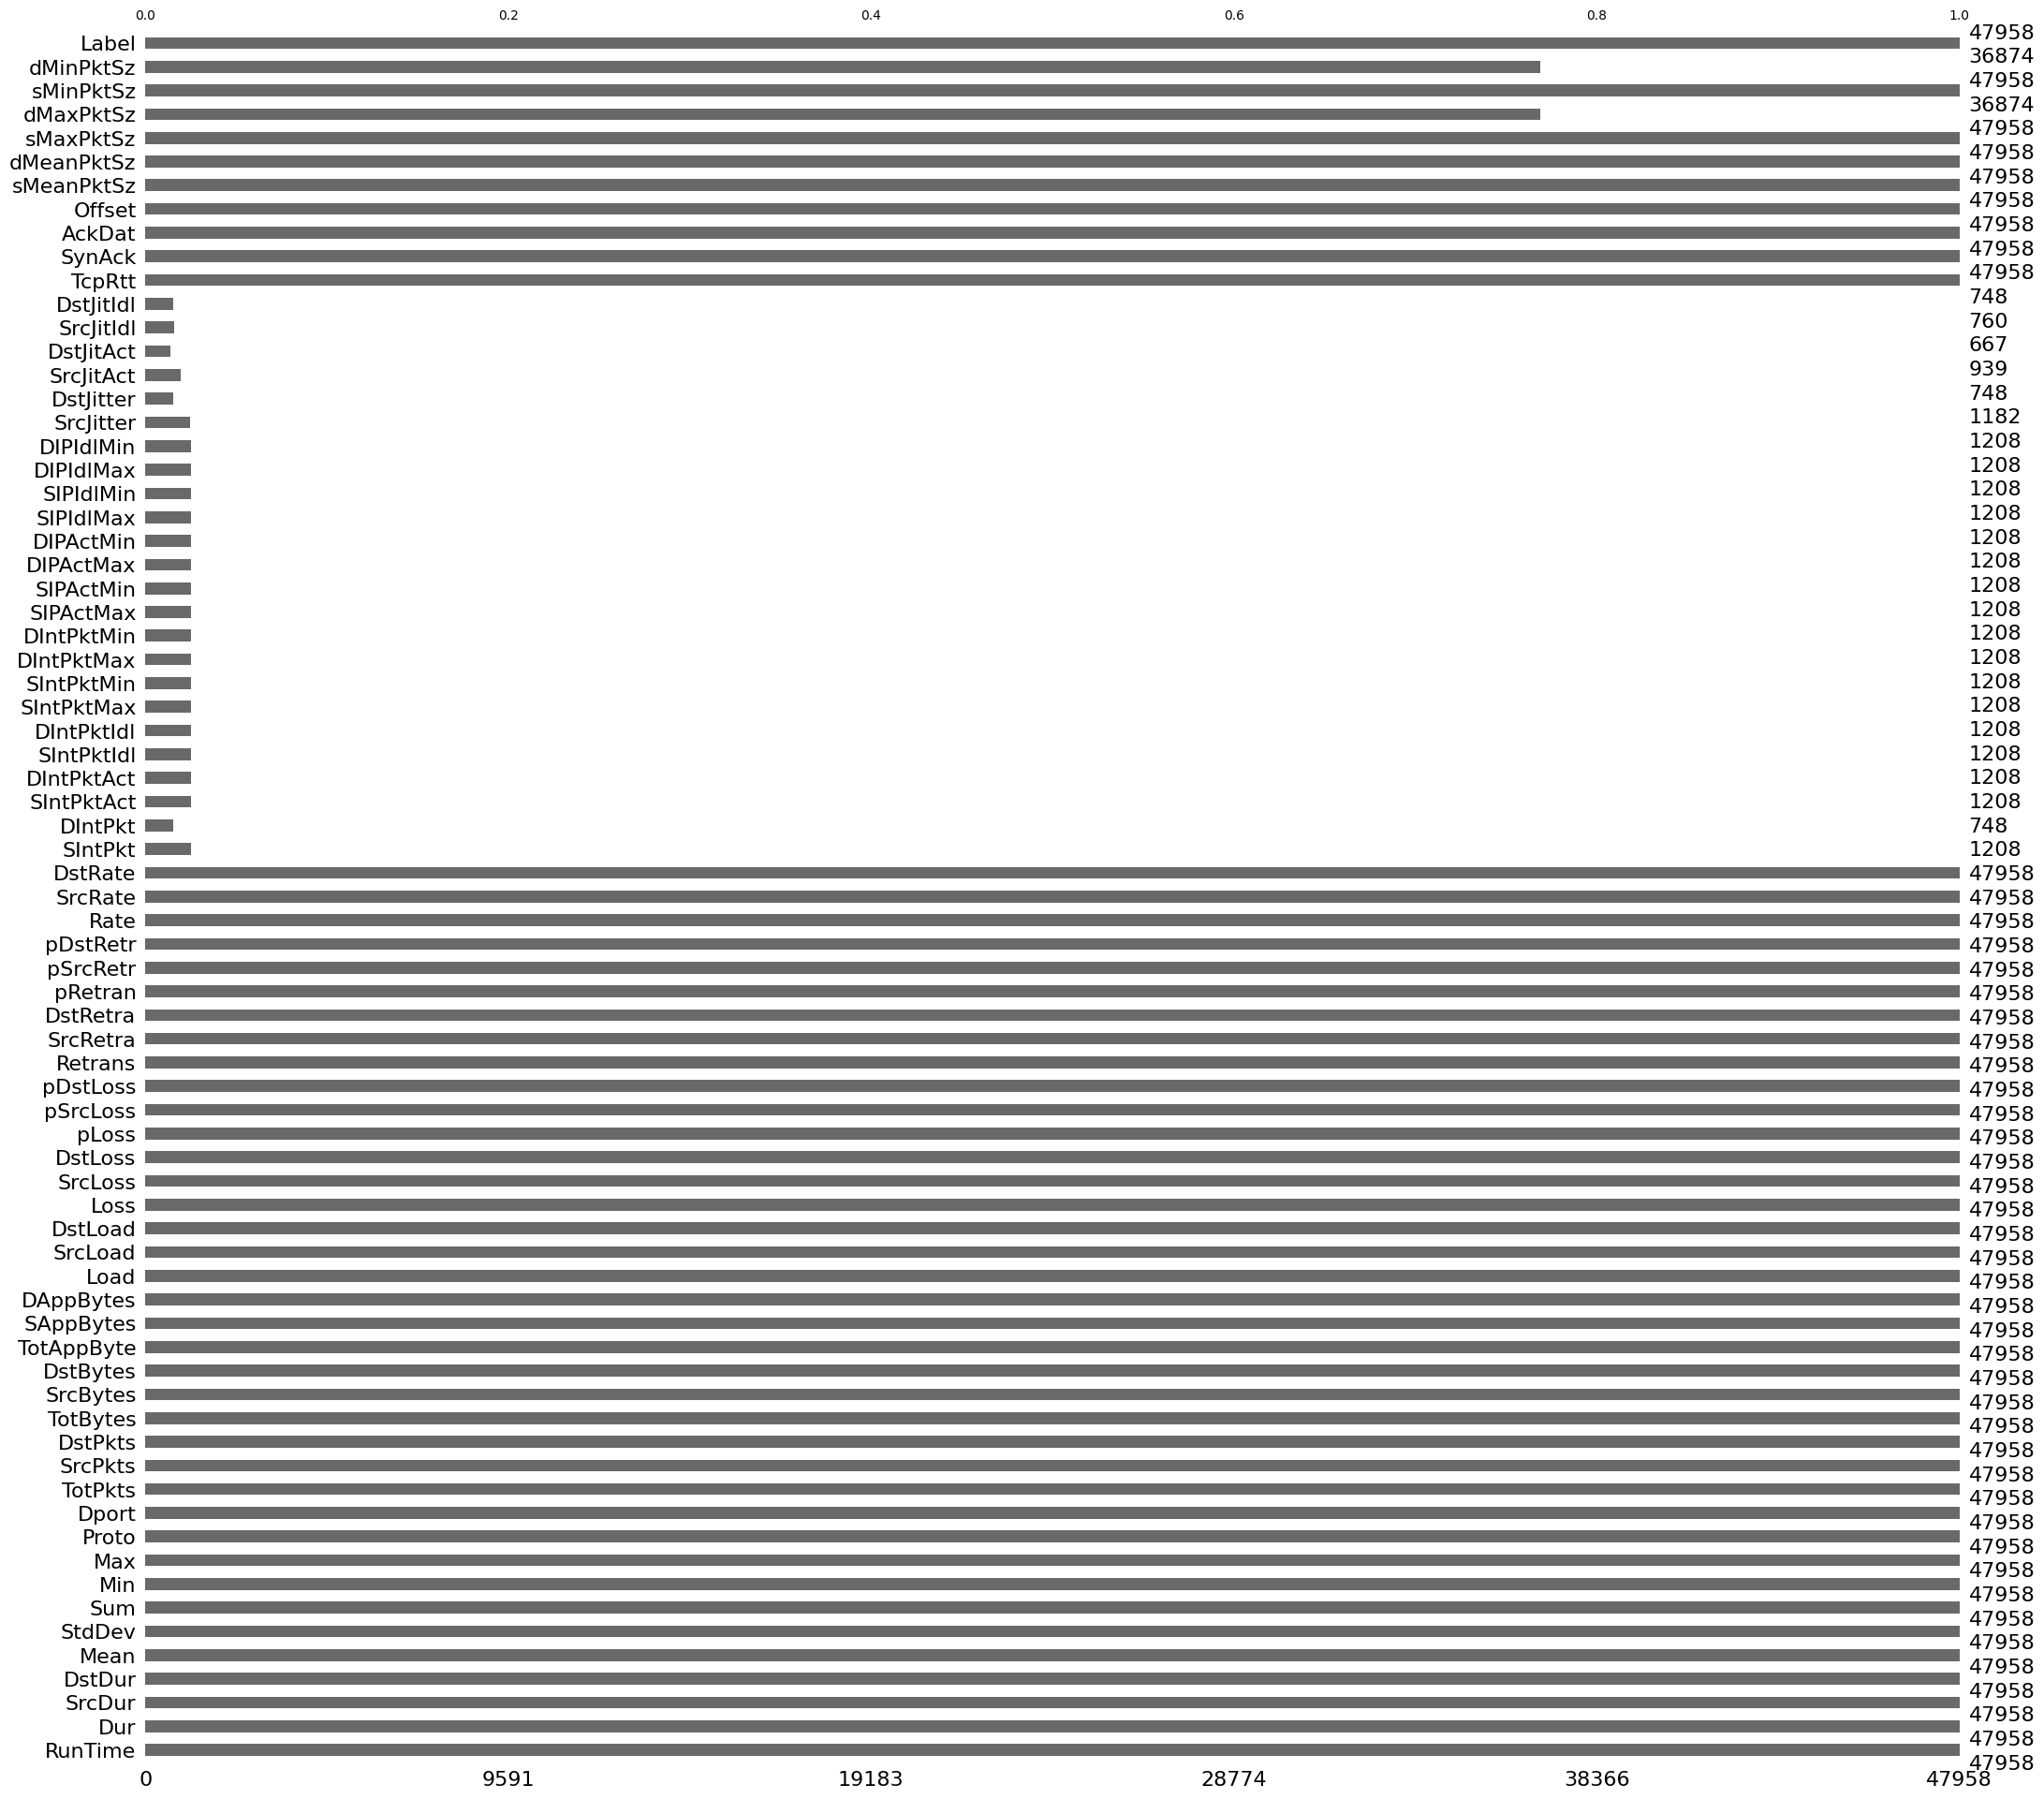

In [40]:
msno.bar(df_probe)

Algunos atributos basados en actividad de paquetes y fluctuacion se encuentran con un numero muy elevado de valores faltantes (probable a eliminar).

#### Eliminar valores faltantes 

In [41]:
"""caracteristicas con datos faltantes muy elevados"""
faltantes=['SIntPkt','DIntPkt','SIntPktAct','DIntPktAct','SIntPktIdl','DIntPktIdl',
'SIntPktMax','SIntPktMin','DIntPktMax','DIntPktMin','SIPActMax'
,'SIPActMin','DIPActMax','DIPActMin','SIPIdlMax','SIPIdlMin','DIPIdlMax','DIPIdlMin'
,'SrcJitter','DstJitter','SrcJitAct','DstJitAct','SrcJitIdl','DstJitIdl']

In [42]:
df_probe.drop(columns=faltantes, axis=1, inplace=True)

<AxesSubplot: >

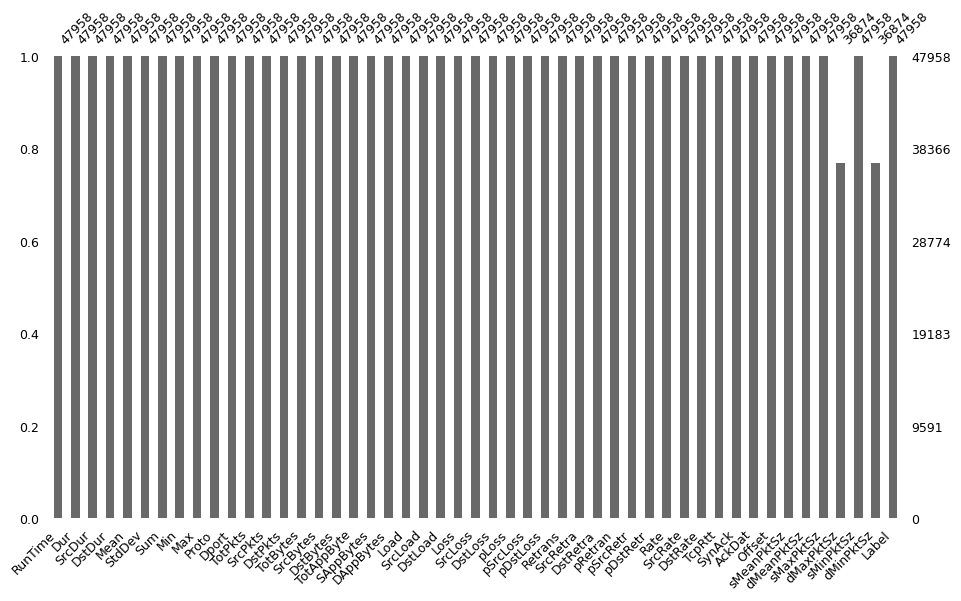

In [47]:
msno.bar(df_probe, figsize=(11,6), fontsize=9)

#### Imputacion de datos faltantes
Se analizar la cantidad de paquetes, bytes por destino y origen, asi como el promedio, el minimo y maximo del tamaño de paquetes.

In [48]:
"""Imputacion de datos"""
im_sd_maxminpktz=SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0.0)
im_sd_maxminpktz=im_sd_maxminpktz.fit(df_probe[['dMaxPktSz']])
df_probe['dMaxPktSz'] = im_sd_maxminpktz.transform(df_probe[['dMaxPktSz']])

im_sd_maxminpktz=im_sd_maxminpktz.fit(df_probe[['dMinPktSz']])
df_probe['dMinPktSz'] = im_sd_maxminpktz.transform(df_probe[['dMinPktSz']])


<AxesSubplot: >

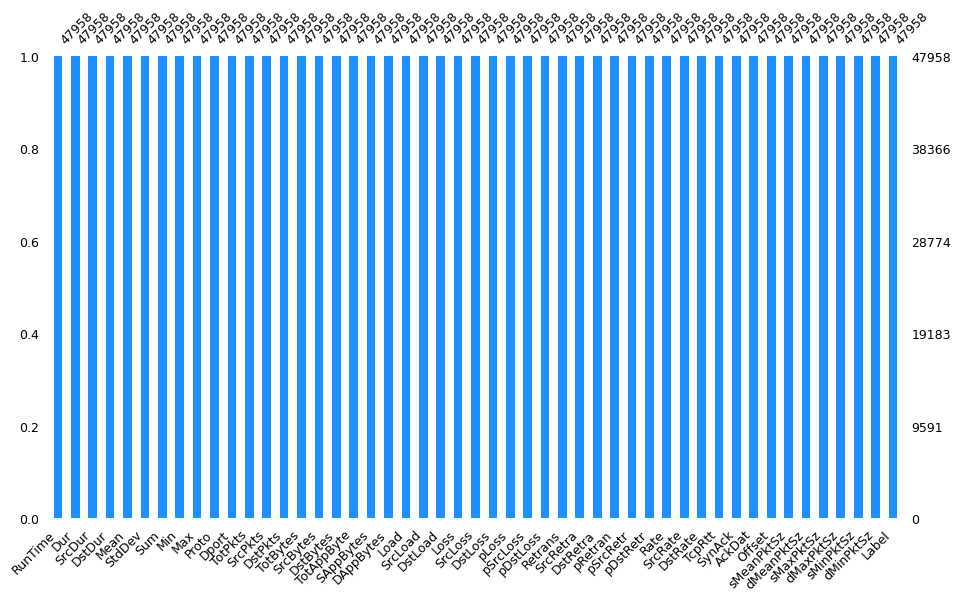

In [49]:
msno.bar(df_probe, figsize=(11,6), fontsize=9, color="dodgerblue")

# 3. Valores atípicos
Se analizan posibles valores atípicos

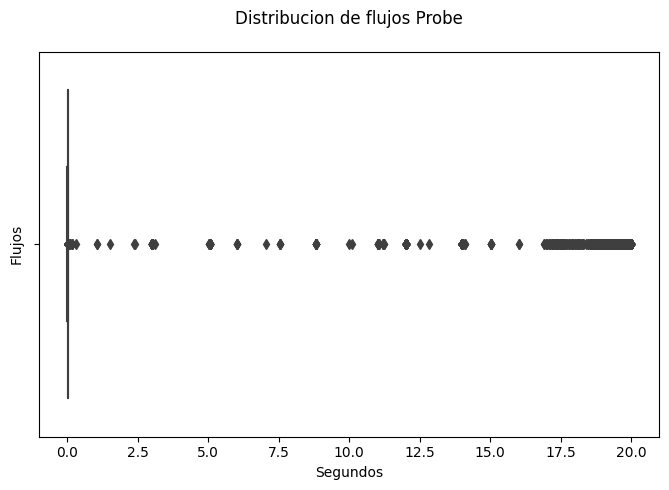

In [55]:
"""crear boxplot"""
plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x = df_probe.Dur)
ax.set_xlabel("Segundos", fontsize = 10)
ax.set_ylabel("Flujos", fontsize = 10)
ax.set_title("Distribucion de flujos Probe", fontsize =12, pad = 20)
plt.show()

In [58]:
df_probe.describe()

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,TotPkts,...,TcpRtt,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz
count,47958.000000,47958.000000,47958.000000,47958.000000,47958.000000,47958.0,47958.000000,47958.000000,47958.000000,47958.000000,...,47958.000000,47958.000000,47958.000000,4.795800e+04,47958.000000,47958.000000,47958.000000,47958.000000,47958.000000,47958.000000
mean,0.354104,0.354104,0.349395,0.244664,0.354104,0.0,0.354104,0.354104,0.354104,6.464594,...,0.000007,0.000001,0.000006,5.193917e+06,65.147917,42.956819,133.883857,45.934213,57.647629,41.695734
std,2.426054,2.426054,2.414347,2.136573,2.426054,0.0,2.426054,2.426054,2.426054,112.975403,...,0.000158,0.000056,0.000130,2.981558e+06,81.456315,26.815561,681.426088,75.534750,10.820392,22.912634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.280000e+02,42.000000,0.000000,42.000000,0.000000,42.000000,0.000000
25%,0.001553,0.001553,0.000000,0.000000,0.001553,0.0,0.001553,0.001553,0.001553,2.000000,...,0.000000,0.000000,0.000000,2.636488e+06,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
50%,0.002684,0.002684,0.000000,0.000000,0.002684,0.0,0.002684,0.002684,0.002684,2.000000,...,0.000000,0.000000,0.000000,5.508472e+06,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
75%,0.004347,0.004347,0.000000,0.000000,0.004347,0.0,0.004347,0.004347,0.004347,2.000000,...,0.000000,0.000000,0.000000,7.553696e+06,58.000000,54.000000,58.000000,54.000000,58.000000,54.000000
max,19.999998,19.999998,19.999985,19.999996,19.999998,0.0,19.999998,19.999998,19.999998,10287.000000,...,0.015716,0.005076,0.010661,1.043077e+07,1450.000000,528.838257,7096.000000,6578.000000,262.000000,74.000000


El tiempo maximo de duracion de flujos en trafico Probe es de 19.99 segundos, el minimo es de 0 segundos y el promedio es de aproximadamente 0.00264 milisegundos. En este no se consideran como valores atípicos los flujos que se encuentran en el primer y cuarto cuartil.

In [67]:
df_probe.shape

(47958, 49)

In [66]:
df_probe.to_csv('../../araDataFin/avances/limpieza_probe_3ValoresAtipicos.csv',index=False)

Hasta aqui guardé los datos. Estan protocolos UDP, TCP e ICMP.

# 4. Codificacion de etiquetas

En este apartado por ahora trabajaré solo en L4, porque si quiero trabajar en L3 tendré que eliminar la caracteristicas Dport, puesto que no tiene un puerto destino.

In [68]:
df_probe[ (df_probe.Proto=='icmp')]

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Proto,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
24,19.020939,19.020939,19.020939,0.0,19.020939,0.0,19.020939,19.020939,19.020939,icmp,...,0.0,0.0,6564,114.0,0.0,114.0,0.0,114.0,0.0,Probe
26,16.018255,16.018255,16.018255,0.0,16.018255,0.0,16.018255,16.018255,16.018255,icmp,...,0.0,0.0,6908,114.0,0.0,114.0,0.0,114.0,0.0,Probe
39,19.021940,19.021940,19.021940,0.0,19.021940,0.0,19.021940,19.021940,19.021940,icmp,...,0.0,0.0,9728,114.0,0.0,114.0,0.0,114.0,0.0,Probe
45,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,icmp,...,0.0,0.0,10996,114.0,0.0,114.0,0.0,114.0,0.0,Probe
62,18.538912,18.538912,18.538912,0.0,18.538912,0.0,18.538912,18.538912,18.538912,icmp,...,0.0,0.0,14664,114.0,0.0,114.0,0.0,114.0,0.0,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41361,0.007748,0.007748,0.000000,0.0,0.007748,0.0,0.007748,0.007748,0.007748,icmp,...,0.0,0.0,8494788,42.0,42.0,42.0,42.0,42.0,42.0,Probe
45392,0.001657,0.001657,0.000000,0.0,0.001657,0.0,0.001657,0.001657,0.001657,icmp,...,0.0,0.0,9460556,42.0,42.0,42.0,42.0,42.0,42.0,Probe
45393,0.001758,0.001758,0.000000,0.0,0.001758,0.0,0.001758,0.001758,0.001758,icmp,...,0.0,0.0,9460684,42.0,42.0,42.0,42.0,42.0,42.0,Probe
45394,0.001834,0.001834,0.000000,0.0,0.001834,0.0,0.001834,0.001834,0.001834,icmp,...,0.0,0.0,9460812,42.0,42.0,42.0,42.0,42.0,42.0,Probe


In [69]:
eliminar_filasvaloresDesconocidos(df_probe, df_probe[(df_probe.Proto=='icmp')])

In [70]:
df_probe.shape

(42715, 49)

#### Codificar Protocolos

In [65]:
df_probe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47958 entries, 1 to 49450
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     47958 non-null  float64
 1   Dur         47958 non-null  float64
 2   SrcDur      47958 non-null  float64
 3   DstDur      47958 non-null  float64
 4   Mean        47958 non-null  float64
 5   StdDev      47958 non-null  float64
 6   Sum         47958 non-null  float64
 7   Min         47958 non-null  float64
 8   Max         47958 non-null  float64
 9   Proto       47958 non-null  object 
 10  Dport       47958 non-null  object 
 11  TotPkts     47958 non-null  int64  
 12  SrcPkts     47958 non-null  int64  
 13  DstPkts     47958 non-null  int64  
 14  TotBytes    47958 non-null  int64  
 15  SrcBytes    47958 non-null  int64  
 16  DstBytes    47958 non-null  int64  
 17  TotAppByte  47958 non-null  int64  
 18  SAppBytes   47958 non-null  int64  
 19  DAppBytes   47958 non-nul

Atributos no numericos: Proto(ordinal), Dport(ordinal), Label(ordinal-nominal)

In [71]:
df_probe.Proto.unique()

array(['tcp', 'udp'], dtype=object)

In [73]:
df_probe.Proto.replace({'tcp':6, 'udp':17},inplace=True )

#### Codificando Puertos

In [76]:
df_probe.Dport.replace({'x11':6000, 'x11-1':6001,'x11-2':6002,'x11-3':6003,'x11-4':6004,
'x11-5':6005,'x11-6':6006,'x11-7':6007},inplace=True )

In [77]:
df_probe.Dport.replace({'domain':53, 'mysql':3306, 'http':80, 'https':443, 'discard':9, 'radius':1812, 'tacacs':49, 'ms-sql-s':1433, 'sip':5060, 'daytime':13, 
'snmp':161, 'afs3-fileserver':7000, 'svrloc':427, 'kpasswd':464, 'microsoft-ds':445, 'chargen':19, 'ms-sql-m':1434, 'netbios-ssn':139,
'gnutella-svc':6346, 'kerberos':88, 'ldap':389, 'time':37, 'sunrpc':111, 'nfs':832, 'kshell':544, 'xmpp-client':5222, 'whois':63, 
'submissions':465, 'tproxy':3346, 'tcpmux':1, 'ftp-data':20, 'qotd':17, 'rsync':873, 'login':513, 'cisco-sccp':2000, 'rootd':1094, 
'proofd':1093, 'finger':79, 'afs3-callback':7001, 'snpp':444, 'font-service':7100, 'shell':514, 'afpovertcp':548, 'svn':3690, 'afs3-bos':7007, 
'kerberos-adm':749, 'socks':1080, 'ipp':631, 'nut':3493, 'postgresql':5432, 'bgp':179, 'radmin-port':4899, 'ldaps':636, 'cvspserver':2401, 'echo':7, 
'lotusnote':1352, 'sane-port':6566, 'telnets':992, 'bacula-sd':9103, 'afs3-kaserver':7004, 'gris':2135, 'xmpp-server':5269, 'afs3-prserver':7002, 
'exec':512, 'ftp':21, 'submission':587, 'pop3s':995, 'smux':199, 'ms-wbt-server':3389, 'smtp':25, 'ssh':22, 'auth':113, 'telnet':23, 'imaps':993, 
'pop3':110, 'rtsp':554, 'printer':515, 'epmap':135, 'bacula-fd':9102, 'ftps':990, 'iscsi-target':3260, 'nntp':119, 'git':9418, 'gsiftp':2811, 
'daap':3689, 'cmip-man':163, 'bacula-dir':9101, 'klogin':543, 'rmiregistry':1099, 'nntps':563, 'ingreslock':1524, 'gopher':70, 
'gsigatekeeper':2119, 'netbios-ns':137, 'ntp':123, 'l2f':1701, 'biff':512,'talk':517, 'radius-acct':1813, 'tftp':69, 'netbios-dgm':138, 
'sa-msg-port':1646, 'ipsec-nat-t':4500, 'route':520, 'syslog':514, 'snmp-trap':2697, 'gnutella-rtr':6347, 'mdns':5353, 'isakmp':500,
'ntalk':518, 'asf-rmcp':623, 'icpv2':3130, 'who':513, 'rmtcfg':1236, 'moira-update': 777, 'amandaidx': 10082, 'cfinger': 2003, 'ripd': 2602,
'isisd': 2608, 'ircd': 6667, 'iprop':2121, 'ospfd': 2604, 'enbd-cstatd': 5051, 'zope-ftp':8021, 'bgpd':2605, 'imap2': 143, 'http-alt':591, 
'ospfapi':8899, 'omniorb': 8088, 'poppassd':106, 'spamd': 783, 'sip-tls': 5061, 'hostmon': 5355, 'datametrics': 1645,
'route':520, 'rplay' : 5555, 'fsp': 21,'nrpe':5666, 'webmin':10000, 'zebra':346},inplace=True )

In [78]:
df_probe.Dport.value_counts()

6653     593
53       414
49259    328
46250    224
48537    220
        ... 
2223       4
19039      4
20817      4
1885       4
34750      2
Name: Dport, Length: 1838, dtype: int64

#### Codificar etiqueta Label

No se realiza la codificacion de esta etiqueta, se realizara al momento de concatenar todas las clases.



Se procede a guardar los datos ya codificados.

In [80]:
df_probe.to_csv('../../araDataFin/limpieza_fase2/probe_4.csv',index=False)